In [1]:
from src.latent_space.models.auto_encoder import build_encoder, build_decoder, AutoEncoder

from src.data.preprocessing import preprocess

from src.data.load_data import load_sample_train_test, convert_to_torch_dataset
from src.utils.misc import init_notebook
from src.latent_space.models.variational_auto_encoder import (
    device,
    Autoencoder,
    VariationalAutoencoder,
    train,
    train_vae,
)
from src.latent_space.plot import plot_latent, plot_reconstructed, interpolate

In [2]:
init_notebook()

Generator(PCG64) at 0x23D324210E0

In [3]:
x_train, x_test, y_train, y_test = load_sample_train_test()

In [4]:
x_train = preprocess(x_train)
x_test = preprocess(x_test)

In [5]:
x_train.shape

(2392, 784)

In [6]:
e = build_encoder()
e.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 26)             │        20,410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,354 (99.04 KB)

 Trainable params: 25,354 (99.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
d = build_decoder()
d.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 26)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1568)           │        42,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 16)     │         4,624 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │         4,640 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 784)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,889 (202.69 KB)

 Trainable params: 51,889 (202.69 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
auto_encoder = AutoEncoder()

In [9]:
auto_encoder.fit(x_train)

Epoch 1/10
 9/60 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2225

C:\Users\AB2-PC\Documents\GitHub\ab2\recognize-handwritten-letters\.venv\lib\site-packages\keras\src\backend\common\backend_utils.py:91: UserWarning: You might experience inconsistencies across backends when calling conv transpose with kernel_size=3, stride=2, dilation_rate=1, padding=same, output_padding=1.
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1587 - val_loss: 0.0753
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0736 - val_loss: 0.0732
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0719 - val_loss: 0.0721
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0694 - val_loss: 0.0639
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0574 - val_loss: 0.0429
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0377 - val_loss: 0.0297
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0273 - val_loss: 0.0246
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0225 - val_loss: 0.0215
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0192 - val_loss: 0.0191
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0170 - val_loss: 0.0174


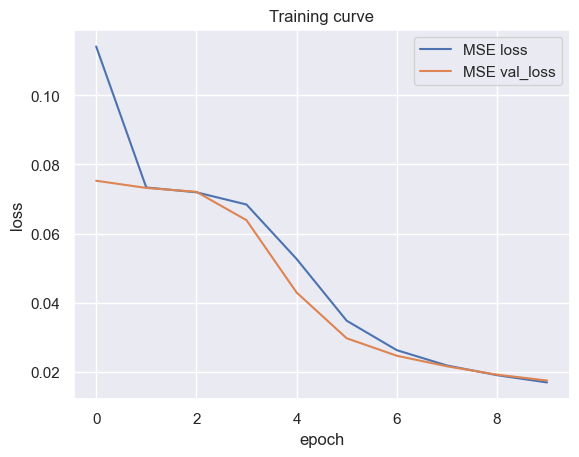

In [10]:
_ = auto_encoder.plot_training_curve()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


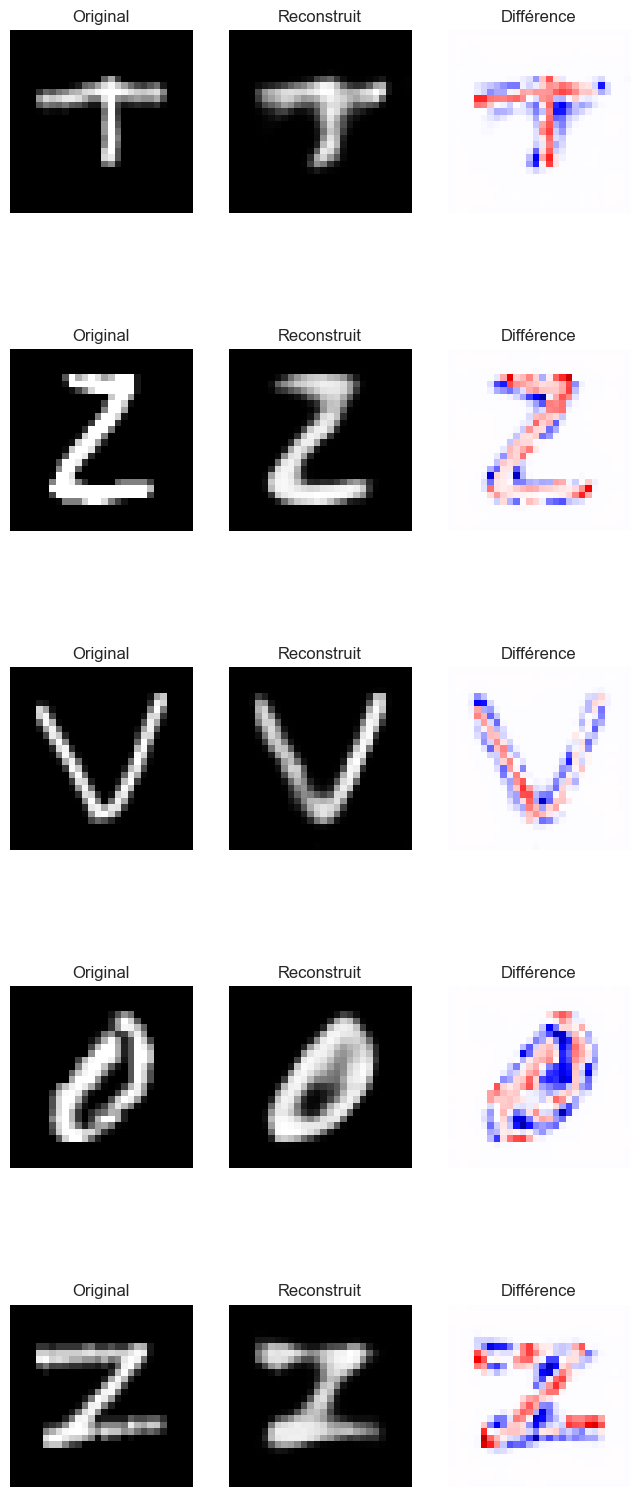

In [11]:
_ = auto_encoder.visualize(x_test)

# VAE

In [12]:
latent_dims = 2
autoencoder = Autoencoder(latent_dims).to(device)

In [13]:
data = convert_to_torch_dataset(x_train, y_train)
data_loader = data

In [14]:
autoencoder = train(autoencoder, data_loader)

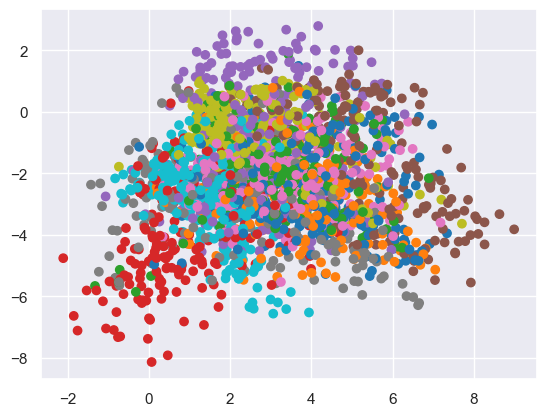

In [15]:
plot_latent(autoencoder, data_loader)

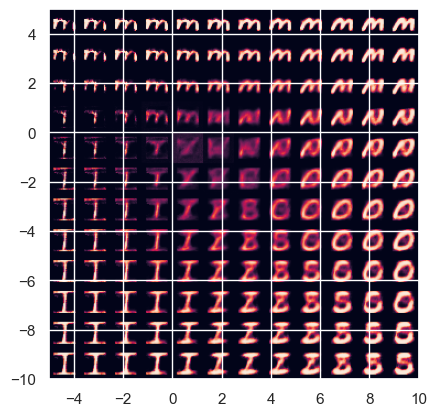

In [16]:
plot_reconstructed(autoencoder)

In [17]:
vae = VariationalAutoencoder(latent_dims).to(device)  # GPU
vae = train_vae(vae, data_loader)

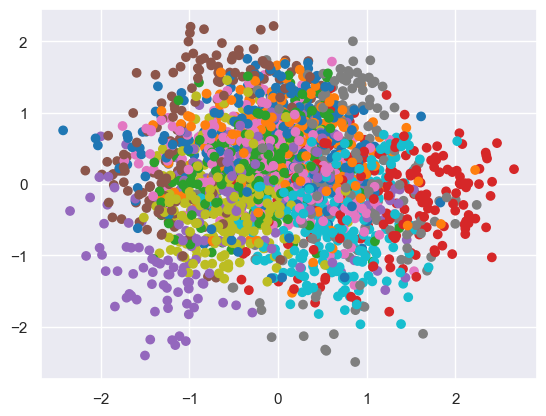

In [18]:
plot_latent(vae, data_loader)

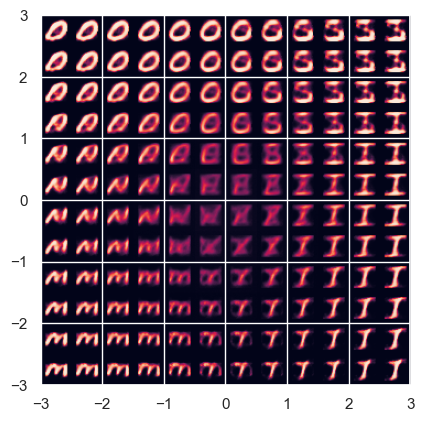

In [19]:
plot_reconstructed(vae, r0=(-3, 3), r1=(-3, 3))

In [20]:
x, y = next(data_loader.__iter__())  # hack to grab a batch
x_1 = x[y == 1][1].to(device)  # find a 1
x_2 = x[y == 0][1].to(device)  # find a 0

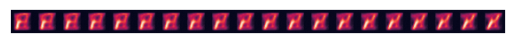

In [21]:
interpolate(vae, x_1, x_2, n=20)

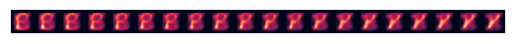

In [22]:
interpolate(autoencoder, x_1, x_2, n=20)